In [2]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import re
from spacy.matcher import Matcher
from spacy.util import filter_spans

In [3]:
jsonData = pd.read_json('News_Category_Dataset.json', lines=True)

In [4]:
jsonData

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


In [5]:
jsonData['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [6]:
jsonData['headline'][8]

"Mike Myers Reveals He'd 'Like To' Do A Fourth Austin Powers Film"

In [7]:
jsonData['short_description'][8]

'Myer\'s kids may be pushing for a new "Powers" film more than anyone.'

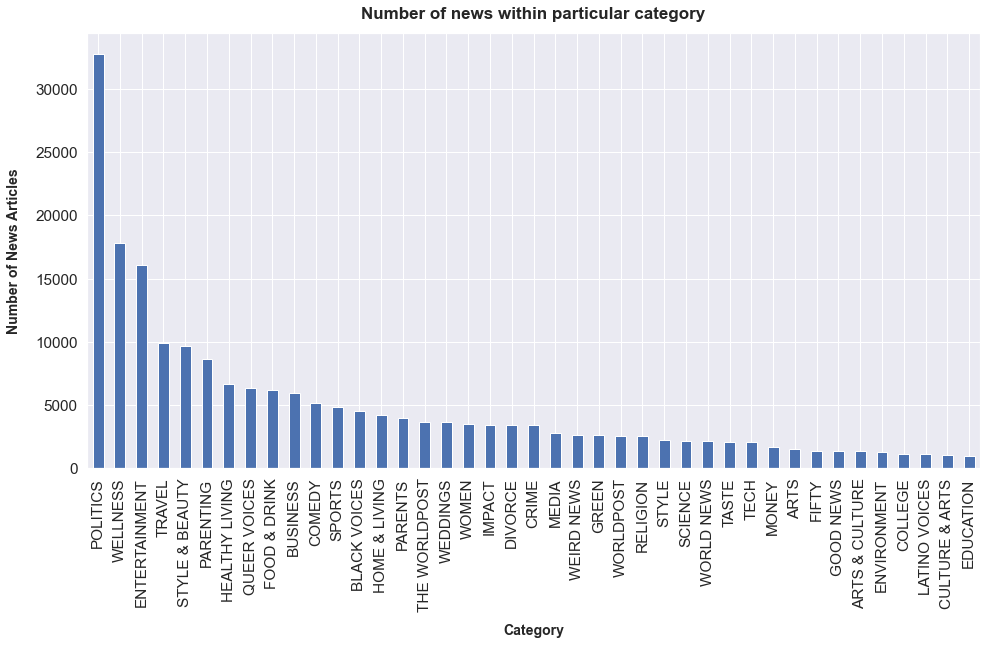

In [8]:
sns.set(font_scale=1.4)
jsonData['category'].value_counts().plot(kind="bar", figsize=(16, 8))
plt.xlabel("Category", labelpad=12, fontsize=14, fontweight="bold")
plt.ylabel("Number of News Articles", labelpad=14, fontsize=14, fontweight="bold")
plt.title("Number of news within particular category", fontsize=17, fontweight="bold", y=1.02);

In [9]:
jsonData[jsonData['category']=='HOME & LIVING']['short_description'][:10]

125000    And just as soon as I try and boast of some su...
125048    Maybe you've suppressed grade school cafeteria...
125058    Best Big-City Neighborhoods ** Have something ...
125091    Even if a rug doesn't look dirty, moths could ...
125092    As a general rule, it's wise to take 20 percen...
125094    Whether you're ready to admit it or not, it's ...
125109    If you've stayed away from vertical blinds whe...
125189    No matter where we go on vacation, the hotel i...
125237    The first day of spring doesn't just mark the ...
125298    I'm officially declaring 2014 the perfect time...
Name: short_description, dtype: object

In [10]:
jsonData[jsonData['category']=='DIVORCE']['short_description'][:10]

125009    Breakups are a very special and pointed type o...
125012    I’ve been a sex worker for six years–my entire...
125022    Worried about the state of Blake Shelton and M...
125028    If there's ever a time you need a little distr...
125043    Let's face it, when we fall in love and commit...
125103    Forgiveness isn't a pardon. It acknowledges th...
125123    A growing body of literature now suggests that...
125124    Somewhere, between standing on a beach and tel...
125126    Keep in touch! Check out HuffPost Divorce on F...
125142    In a newly released trailer for the show, McDe...
Name: short_description, dtype: object

In [11]:
jsonData[jsonData['category']=='BUSINESS']['short_description'][:10]

87      The investigation could lead to new U.S. tarif...
337     The new policy was unveiled weeks after the co...
603     Following the council vote, Amazon’s vice pres...
604     Victims will be free to go to court -- but a f...
669     The breach is believed to have occurred betwee...
711     Just by using the app, you click away your rig...
715     The city wants to tax large corporations to pa...
976     The bank pledged in April to stop financing co...
1217    Martin Winterkorn resigned soon after the scan...
1295    Verizon launched an investigation soon after H...
Name: short_description, dtype: object

In [12]:
jsonData[jsonData['category']=='WORLDPOST']['short_description'][:10]

34622                                                     
34626                                                     
34704    Since the Brexit referendum last summer, there...
34705    I am one of many in Bangladesh and around the ...
34719                                                     
35349                                                     
35351                                                     
37224                                                     
37226                                                     
37853                                                     
Name: short_description, dtype: object

In [13]:
jsonData.shape

(200853, 6)

In [14]:
jsonData['Text']= jsonData["headline"].astype(str) +" " + jsonData["short_description"].astype(str)

In [15]:
jsonData

,category,headline,authors,link,short_description,date,Text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28,"Giants Over Patriots, Jets Over Colts Among M..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...


In [16]:
# WELLNESS, HEALTHY LIVING (WELLNES)
# QUEER VOICES, BLACK VOICES, LATINO VOICES (VOICES)
# PARENTING, PARENTS, DIVORCE, WEDDINGS (FAMILY)
# STYLE & BEAUTY, STYLE (FASHION)
# SCIENCE, TECH (SCINCE & TECHNOLOGY)
# WORLD NEWS, THE WORLDPOST, MEDIA, WORLDPOST (WORLD NEWS)
# MEDIA , WEIRD NEWS,GOOD NEWS (MEDIA)
# GREEN, ENVIRONMENT, HOME & LIVING (HYGIENE)
# FOOD & DRINK, TASTE, ENTERTAINMENT, TRAVEL, COMEDY (ENTERTAINMENT)
# ARTS & CULTURE,CULTURE & ARTS, ARTS (ARTS & CULTURE)
# EDUCATION, COLLEGE (EDUCATION)
# WOMEN, FIFTY (EMPOWERMENT)
# BUSINESS , MONEY (FINANCE)
# SPORTS
# IMPACT
# RELIGION
# POLITICS
# CRIME

In [17]:
sections = {'WELLNESS': 'WELLNESS', 'HEALTHY LIVING': 'WELLNESS',\
                  'QUEER VOICES': 'VOICES','BLACK VOICES':'VOICES','LATINO VOICES': 'VOICES',\
                  'PARENTING':'FAMILY','PARENTS':'FAMILY','DIVORCE':'FAMILY','WEDDINGS':'FAMILY',\
                 'STYLE & BEAUTY': 'FASHION','STYLE': 'FASHION', \
                  'SCIENCE': 'SCIENCE & TECHNOLOGY', 'TECH': 'SCIENCE & TECHNOLOGY',\
                 'WORLD NEWS': 'WORLD NEWS','THE WORLDPOST': 'WORLD NEWS','WORLDPOST':'WORLD NEWS',\
                 'MEDIA': 'MEDIA','WEIRD NEWS':'MEDIA','WEIRD NEWS':'MEDIA','GOOD NEWS':'MEDIA',\
                'GREEN':'HYGIENE','ENVIRONMENT':'HYGIENE','HOME & LIVING':'HYGIENE',\
                'FOOD & DRINK':'ENTERTAINMENT','TASTE':'ENTERTAINMENT','ENTERTAINMENT':'ENTERTAINMENT', 'TRAVEL':'ENTERTAINMENT','COMEDY':'ENTERTAINMENT',\
                 'ARTS & CULTURE':'ARTS & CULTURE','CULTURE & ARTS':'ARTS & CULTURE','ARTS':'ARTS & CULTURE',\
                 'EDUCATION':'EDUCATION','COLLEGE':'EDUCATION',\
                 'WOMEN':'EMPOWERMENT','FIFTY':'EMPOWERMENT',\
                 'BUSINESS':'FINANCE','MONEY':'FINANCE',\
                 'SPORTS':'SPORTS',\
                 'IMPACT':'IMPACT',\
                 'RELIGION':'RELIGION',\
                 'POLITICS':'POLITICS',\
                 'CRIME':'CRIME'}

In [18]:
jsonData["Section"] = jsonData["category"].map(sections)

In [19]:
jsonData['Section'].value_counts()

ENTERTAINMENT           39442
POLITICS                32739
WELLNESS                24521
FAMILY                  19709
VOICES                  11971
FASHION                 11903
WORLD NEWS               8420
HYGIENE                  8140
FINANCE                  7644
MEDIA                    6883
EMPOWERMENT              4891
SPORTS                   4884
SCIENCE & TECHNOLOGY     4260
ARTS & CULTURE           3878
IMPACT                   3459
CRIME                    3405
RELIGION                 2556
EDUCATION                2148
Name: Section, dtype: int64

In [20]:
jsonData

,category,headline,authors,link,short_description,date,Text,Section
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,CRIME
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Hugh Grant Marries For The First Time At Age 5...,ENTERTAINMENT
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT
...,...,...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,SCIENCE & TECHNOLOGY
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS


In [21]:
sum(jsonData['Text'] == '')

0

In [22]:
jsonData['Text'].isnull().values.any()

False

In [23]:
jsonData['Text'][0]

'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV She left her husband. He killed their children. Just another day in America.'

## Data Cleaning

In [24]:
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

In [25]:
def lemmatize(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

def to_lower(text):
    return text.lower()

def preprocessed_text(text):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', text)
    text = lemmatize(text)
    text = to_lower(text)
    return text


In [26]:
jsonData['Cleaned Text'] = jsonData['Text'].apply(preprocessed_text)

In [27]:
jsonData['Cleaned Text'][2000]

'the no 2 question in westworld finally have an answer one mystery remain in the bowel of the park until we talk to steven ogg'

In [28]:
stopwords = nltk.corpus.stopwords.words('english')

In [29]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Tokenzation

In [30]:
def get_tokens(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [31]:
def get_filtered_tokens(tokens):
    tokens_filtered = [t for t in tokens if t not in stopwords and t.isdigit() == False]
    return tokens_filtered
    

In [32]:
jsonData['Word Tokens'] =jsonData['Cleaned Text'].apply(get_tokens)

In [33]:
jsonData['Filtered Tokens'] = jsonData['Word Tokens'].apply(get_filtered_tokens)

In [34]:
jsonData

,category,headline,authors,link,short_description,date,Text,Section,Cleaned Text,Word Tokens,Filtered Tokens
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,CRIME,there be 2 mass shootings in texas last week b...,"[there, be, 2, mass, shootings, in, texas, las...","[mass, shootings, texas, last, week, tv, leave..."
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...,"[will, smith, joins, diplo, and, nicky, jam, f...","[smith, joins, diplo, nicky, jam, world, cups,..."
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Hugh Grant Marries For The First Time At Age 5...,ENTERTAINMENT,hugh grant marrie for the first time at age 57...,"[hugh, grant, marrie, for, the, first, time, a...","[hugh, grant, marrie, first, time, age, actor,..."
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT,jim carrey blasts castrato adam schiff and dem...,"[jim, carrey, blasts, castrato, adam, schiff, ...","[jim, carrey, blasts, castrato, adam, schiff, ..."
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT,julianna margulies use donald trump poop bag t...,"[julianna, margulies, use, donald, trump, poop...","[julianna, margulies, use, donald, trump, poop..."
...,...,...,...,...,...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,SCIENCE & TECHNOLOGY,rim ceo thorsten hein significant plan for bla...,"[rim, ceo, thorsten, hein, significant, plan, ...","[rim, ceo, thorsten, hein, significant, plan, ..."
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,maria sharapova stun by victoria azarenka in a...,"[maria, sharapova, stun, by, victoria, azarenk...","[maria, sharapova, stun, victoria, azarenka, a..."
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,giant over patriots jet over colt among most...,"[giant, over, patriots, jet, over, colt, among...","[giant, patriots, jet, colt, among, improbable..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,aldon smith arrested 49er linebacker bust for ...,"[aldon, smith, arrested, 49er, linebacker, bus...","[aldon, smith, arrested, 49er, linebacker, bus..."


In [36]:
jsonData.to_csv('filtered_data.csv', sep = '|')